# Plots for Figure 3

In [18]:
###Load Packages
#Functions for polyA specific analysis (must be in same path)
from polyA_utils import *

#Packages for general column manipulation and statistics
import numpy as np
import pandas as pd
import csv
from tqdm import tqdm
from scipy import stats
import scipy.stats as sci
import pysam

#Packages for plotting
import matplotlib.pyplot as plt
from statannotations.Annotator import Annotator
import seaborn as sns
sns.set(font_scale=1.5)
sns.set_style("white")

In [19]:
#Color palettes for plots
four_palette = ["darkgreen", "tomato", "steelblue", "orange"]
two_palette = ["steelblue", "orange"]

## Global analysis of poly(A) tail lengths

In [20]:
#Function to read polyA tab del files
def read_polyA_reads(file, min_read_count, sample_name, replicate):
    df = pd.read_csv(file, delimiter='\t')
    df = df.loc[df['tail_len'] >= min_read_count]
    df['Sample'] = sample_name
    df['Replicate'] = replicate
    return(df)

Set master path that points to the experiment directory

In [21]:
#path to the experiment
path = "../../"

In [22]:
#Read in dfs, assign to variables
min_A_count = 10

h112_1 = read_polyA_reads(path + 'results/polyA_len/EV.R1_polyA.txt', min_A_count, "EV", "1")
h112_2 = read_polyA_reads(path + 'results/polyA_len/EV.R2_polyA.txt', min_A_count, "EV", "2")

h113_1 = read_polyA_reads(path + 'results/polyA_len/WT.R1_polyA.txt', min_A_count, "WT", "1")
h113_2 = read_polyA_reads(path + 'results/polyA_len/WT.R2_polyA.txt', min_A_count, "WT", "2")

h115_1 = read_polyA_reads(path + 'results/polyA_len/4SA.R1_polyA.txt', min_A_count, "4SA", "1")
h115_2 = read_polyA_reads(path + 'results/polyA_len/4SA.R2_polyA.txt', min_A_count, "4SA", "2")

h117_1 = read_polyA_reads(path + 'results/polyA_len/4SD.R1_polyA.txt', min_A_count, "4SD", "1")
h117_2 = read_polyA_reads(path + 'results/polyA_len/4SD.R2_polyA.txt', min_A_count, "4SD", "2")

#Path to gene types df (from gtf)
gene_types = pd.read_csv(path + "config/gene_types_df.tsv", sep = "\t")

#Combine replicates and intersect with gene names
all_reads = pd.concat([h112_1, h112_2, h113_1, h113_2, h115_1, h115_2, h117_1, h117_2], ignore_index = True)
all_reads["gene_id"] = all_reads["gene_id"].str.split(".").str[0]
all_reads = all_reads.merge(gene_types, on = 'gene_id')

Percentage of reads that are polyadenylated:

In [23]:
#Caclulate the total number of reads (from wc -l on mapped bed files)
tot_reads = 3540316 #from (wc -l)/4 of all_reads.fastq
print("number of genome mapped reads with poly(A) tails: " + str(len(all_reads)))
print("percentage of mapped reads with poly(A) tails: " + str(len(all_reads)/tot_reads * 100))

number of genome mapped reads with poly(A) tails: 2091774
percentage of mapped reads with poly(A) tails: 59.08438681744793


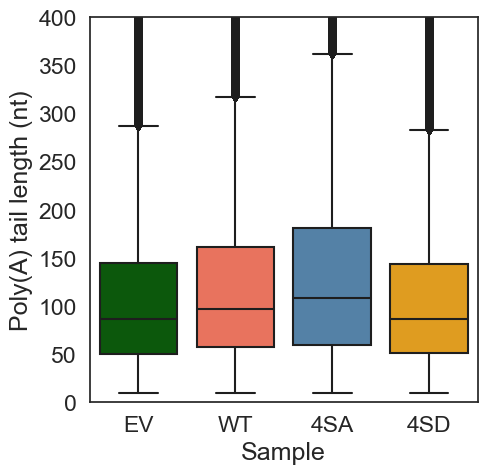

In [26]:
#Boxplot of tail lengths by conditon
f, ax = plt.subplots(1,1, figsize = (5,5))
sns.boxplot(data = all_reads, x = "Sample", y = "tail_len", palette = four_palette)

ax.set_ylim(0,400)
ax.set_ylabel("Poly(A) tail length (nt)")

plt.show()

In [27]:
#Print median tail lengths by condition
all_reads.groupby("Sample").median()

/var/folders/y_/x9kz6ckx4gx2pm_d26qfgy2w0000gn/T/ipykernel_34196/1298660392.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  all_reads.groupby("Sample").median()


,tail_len
Sample,
4SA,108.0
4SD,87.0
EV,86.0
WT,97.0


In [32]:
#trange defines the number of bases to consider in the tail alignment
trange = 400

total_c_h112_1, tail_len_h112_1, base_count_prox_h112_1, base_count_dist_h112_1, base_cov_h112_1 = nonA(path + 'results/mapping/EV.R1_hg38.bam', tail_range = trange)
total_c_h113_1, tail_len_h113_1, base_count_prox_h113_1, base_count_dist_h113_1, base_cov_h113_1 = nonA(path + 'results/mapping/WT.R1_hg38.bam', tail_range = trange)
total_c_h115_1, tail_len_h115_1, base_count_prox_h115_1, base_count_dist_h115_1, base_cov_h115_1 = nonA(path + 'results/mapping/4SA.R1_hg38.bam', tail_range = trange)
total_c_h117_1, tail_len_h117_1, base_count_prox_h117_1, base_count_dist_h117_1, base_cov_h117_1 = nonA(path + 'results/mapping/4SD.R1_hg38.bam', tail_range = trange)

total_c_h112_2, tail_len_h112_2, base_count_prox_h112_2, base_count_dist_h112_2, base_cov_h112_2 = nonA(path + 'results/mapping/EV.R2_hg38.bam', tail_range = trange)
total_c_h113_2, tail_len_h113_2, base_count_prox_h113_2, base_count_dist_h113_2, base_cov_h113_2 = nonA(path + 'results/mapping/WT.R2_hg38.bam', tail_range = trange)
total_c_h115_2, tail_len_h115_2, base_count_prox_h115_2, base_count_dist_h115_2, base_cov_h115_2 = nonA(path + 'results/mapping/4SA.R2_hg38.bam', tail_range = trange)
total_c_h117_2, tail_len_h117_2, base_count_prox_h117_2, base_count_dist_h117_2, base_cov_h117_2 = nonA(path + 'results/mapping/4SD.R2_hg38.bam', tail_range = trange)

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 121037/121037 [00:47<00:00, 2541.26it/s]


In [33]:
#Function to bin nucleotide percentages per position
def bin_array(mut, cov, binsize, **kwargs):
    # reactivity calculation in discrete bins of polymerase positions
    assert len(mut) == len(cov)

    bins = np.arange(0, len(mut), binsize)
    mut_bin = np.zeros(len(bins))
    cov_bin = np.zeros(len(bins))

    for i in range(len(bins)):
        if i < len(bins)-1:
            cov_bin[i] = np.sum(cov[bins[i]:bins[i+1]])
            mut_bin[i] = np.sum(mut[bins[i]:bins[i+1]])

        else: # last bin in case it doesn't add up
            cov_bin[i] = np.sum(cov[bins[i]:])
            mut_bin[i] = np.sum(mut[bins[i]:])
            
    return(bins, mut_bin, cov_bin)

In [34]:
#EV
bins = 5
base_count_dist_a_h112_1_bins = bin_array(base_count_dist_h112_1[0], base_cov_h112_1, bins)
base_count_dist_a_h112_2_bins = bin_array(base_count_dist_h112_2[0], base_cov_h112_2, bins)

base_count_dist_g_h112_1_bins = bin_array(base_count_dist_h112_1[1], base_cov_h112_1, bins)
base_count_dist_g_h112_2_bins = bin_array(base_count_dist_h112_2[1], base_cov_h112_2, bins)

base_count_dist_u_h112_1_bins = bin_array(base_count_dist_h112_1[2], base_cov_h112_1, bins)
base_count_dist_u_h112_2_bins = bin_array(base_count_dist_h112_2[2], base_cov_h112_2, bins)

base_count_dist_c_h112_1_bins = bin_array(base_count_dist_h112_1[3], base_cov_h112_1, bins)
base_count_dist_c_h112_2_bins = bin_array(base_count_dist_h112_2[3], base_cov_h112_2, bins)

In [35]:
#WT
bins = 5
base_count_dist_a_h113_1_bins = bin_array(base_count_dist_h113_1[0], base_cov_h113_1, bins)
base_count_dist_a_h113_2_bins = bin_array(base_count_dist_h113_2[0], base_cov_h113_2, bins)

base_count_dist_g_h113_1_bins = bin_array(base_count_dist_h113_1[1], base_cov_h113_1, bins)
base_count_dist_g_h113_2_bins = bin_array(base_count_dist_h113_2[1], base_cov_h113_2, bins)

base_count_dist_u_h113_1_bins = bin_array(base_count_dist_h113_1[2], base_cov_h113_1, bins)
base_count_dist_u_h113_2_bins = bin_array(base_count_dist_h113_2[2], base_cov_h113_2, bins)

base_count_dist_c_h113_1_bins = bin_array(base_count_dist_h113_1[3], base_cov_h113_1, bins)
base_count_dist_c_h113_2_bins = bin_array(base_count_dist_h113_2[3], base_cov_h113_2, bins)

In [36]:
#4SA
bins = 5
base_count_dist_a_h115_1_bins = bin_array(base_count_dist_h115_1[0], base_cov_h115_1, bins)
base_count_dist_a_h115_2_bins = bin_array(base_count_dist_h115_2[0], base_cov_h115_2, bins)

base_count_dist_g_h115_1_bins = bin_array(base_count_dist_h115_1[1], base_cov_h115_1, bins)
base_count_dist_g_h115_2_bins = bin_array(base_count_dist_h115_2[1], base_cov_h115_2, bins)

base_count_dist_u_h115_1_bins = bin_array(base_count_dist_h115_1[2], base_cov_h115_1, bins)
base_count_dist_u_h115_2_bins = bin_array(base_count_dist_h115_2[2], base_cov_h115_2, bins)

base_count_dist_c_h115_1_bins = bin_array(base_count_dist_h115_1[3], base_cov_h115_1, bins)
base_count_dist_c_h115_2_bins = bin_array(base_count_dist_h115_2[3], base_cov_h115_2, bins)

In [37]:
#4SD
bins = 5
base_count_dist_a_h117_1_bins = bin_array(base_count_dist_h117_1[0], base_cov_h117_1, bins)
base_count_dist_a_h117_2_bins = bin_array(base_count_dist_h117_2[0], base_cov_h117_2, bins)

base_count_dist_g_h117_1_bins = bin_array(base_count_dist_h117_1[1], base_cov_h117_1, bins)
base_count_dist_g_h117_2_bins = bin_array(base_count_dist_h117_2[1], base_cov_h117_2, bins)

base_count_dist_u_h117_1_bins = bin_array(base_count_dist_h117_1[2], base_cov_h117_1, bins)
base_count_dist_u_h117_2_bins = bin_array(base_count_dist_h117_2[2], base_cov_h117_2, bins)

base_count_dist_c_h117_1_bins = bin_array(base_count_dist_h117_1[3], base_cov_h117_1, bins)
base_count_dist_c_h117_2_bins = bin_array(base_count_dist_h117_2[3], base_cov_h117_2, bins)

#### Generate figures to compare nonA use between conditions

Compare C usage - stats for 4SA vs 4SD

/var/folders/y_/x9kz6ckx4gx2pm_d26qfgy2w0000gn/T/ipykernel_34196/3884012890.py:56: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs.set_xticklabels(labels)


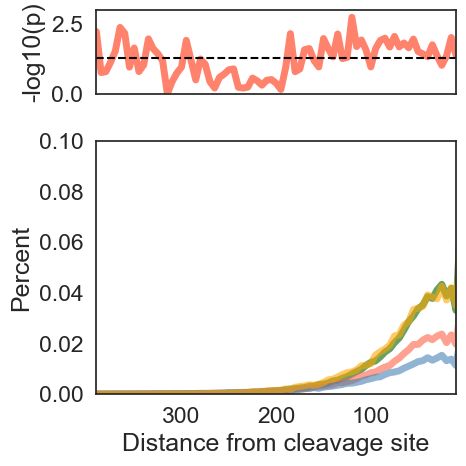

In [41]:
#Run t-test between percent nt ussage at each postion
stat_vals_5 = stats.ttest_ind(
                            [base_count_dist_c_h115_1_bins[1]/(base_count_dist_c_h115_1_bins[2] + base_count_dist_c_h115_1_bins[1]), base_count_dist_c_h115_2_bins[1]/(base_count_dist_c_h115_2_bins[2] + base_count_dist_c_h115_2_bins[1])],
                            [base_count_dist_c_h117_1_bins[1]/(base_count_dist_c_h117_1_bins[2] + base_count_dist_c_h117_1_bins[1]), base_count_dist_c_h117_2_bins[1]/(base_count_dist_c_h117_2_bins[2] + (base_count_dist_c_h117_2_bins[1]))])[-1]

#############################################################

#Figure for percent nt - 5' end A
#Generate plot
fig, (ax2, axs) = plt.subplots(2, 1, gridspec_kw={'height_ratios': [1, 3]}, figsize=(5, 5))

###############################################
#proximal
sns.lineplot(x = (base_count_dist_c_h112_1_bins[0] + base_count_dist_c_h112_2_bins[0])/2, 
             y=(base_count_dist_c_h112_1_bins[1]/(base_count_dist_c_h112_1_bins[2] + base_count_dist_c_h112_1_bins[1])) + 
               (base_count_dist_c_h112_2_bins[1]/(base_count_dist_c_h112_2_bins[2] + base_count_dist_c_h112_2_bins[1]))/2, 
                alpha=.6, color = 'darkgreen', ax = axs, linewidth = 5)


sns.lineplot(x = (base_count_dist_c_h113_1_bins[0] + base_count_dist_c_h113_2_bins[0])/2, 
             y=(base_count_dist_c_h113_1_bins[1]/(base_count_dist_c_h113_1_bins[2] + base_count_dist_c_h113_1_bins[1])) + 
               (base_count_dist_c_h113_2_bins[1]/(base_count_dist_c_h113_2_bins[2] + base_count_dist_c_h113_2_bins[1]))/2, 
                alpha=.6, color = 'tomato', ax = axs, linewidth = 5)

sns.lineplot(x = (base_count_dist_c_h115_1_bins[0] + base_count_dist_c_h115_2_bins[0])/2, 
             y=(base_count_dist_c_h115_1_bins[1]/(base_count_dist_c_h115_1_bins[2] + base_count_dist_c_h115_1_bins[1])) + 
               (base_count_dist_c_h115_2_bins[1]/(base_count_dist_c_h115_2_bins[2] + base_count_dist_c_h115_2_bins[1]))/2, 
                alpha=.6, color = 'steelblue', ax = axs, linewidth = 5)

sns.lineplot(x = (base_count_dist_c_h117_1_bins[0] + base_count_dist_c_h117_2_bins[0])/2, 
             y=(base_count_dist_c_h117_1_bins[1]/(base_count_dist_c_h117_1_bins[2] + base_count_dist_c_h117_1_bins[1])) + 
               (base_count_dist_c_h117_2_bins[1]/(base_count_dist_c_h117_2_bins[2] + base_count_dist_c_h117_2_bins[1]))/2, 
                alpha=.6, color = 'orange', ax = axs, linewidth = 5)


ax2 = sns.lineplot(x = (base_count_dist_c_h115_1_bins[0] + base_count_dist_c_h115_2_bins[0])/2, 
                   y = -np.log10(stat_vals_5), 
                   alpha=.8, color = 'tomato', ax = ax2, linewidth = 5)

ax2.set_ylabel("-log10(p)")
ax2.axhline(-np.log10(0.05), linestyle = '--', color = 'black')

axs.set_xlim(10, 390)
ax2.set_xlim(10, 390)
ax2.set(xticklabels=[])  # remove the tick labels
ax2.tick_params(bottom=False)  # remove the ticks

axs.set_ylim(0, 0.1)
ax2.set_ylim(0,3)


axs.set_ylabel("Percent")
axs.set_xlabel("Distance from cleavage site")

labels = [400,300,200,100]
axs.set_xticklabels(labels)

fig.tight_layout()

plt.show()

Compare G usage - stats for 4SA vs 4SD

/var/folders/y_/x9kz6ckx4gx2pm_d26qfgy2w0000gn/T/ipykernel_34196/2265175007.py:53: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs.set_xticklabels(labels)


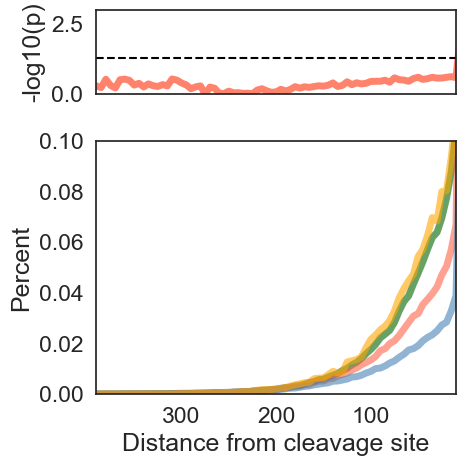

In [42]:
#Run t-test between percent nt ussage at each postion
stat_vals_5 = stats.ttest_ind(
                            [base_count_dist_g_h115_1_bins[1]/(base_count_dist_g_h115_1_bins[2] + base_count_dist_g_h115_1_bins[1]), base_count_dist_g_h115_2_bins[1]/(base_count_dist_g_h115_2_bins[2] + base_count_dist_g_h115_2_bins[1])],
                            [base_count_dist_g_h117_1_bins[1]/(base_count_dist_g_h117_1_bins[2] + base_count_dist_g_h117_1_bins[1]), base_count_dist_g_h117_2_bins[1]/(base_count_dist_g_h117_2_bins[2] + (base_count_dist_g_h117_2_bins[1]))])[-1]


#############################################################

#Figure for percent nt - 5' end A
#Generate plot
fig, (ax2, axs) = plt.subplots(2, 1, gridspec_kw={'height_ratios': [1, 3]}, figsize=(5, 5))

###############################################
#proximal
sns.lineplot(x = (base_count_dist_g_h112_1_bins[0] + base_count_dist_g_h112_2_bins[0])/2, 
             y=(base_count_dist_g_h112_1_bins[1]/(base_count_dist_g_h112_1_bins[2] + base_count_dist_g_h112_1_bins[1])) + 
               (base_count_dist_g_h112_2_bins[1]/(base_count_dist_g_h112_2_bins[2] + base_count_dist_g_h112_2_bins[1]))/2, 
                alpha=.6, color = 'darkgreen', ax = axs, linewidth = 5)


sns.lineplot(x = (base_count_dist_g_h113_1_bins[0] + base_count_dist_g_h113_2_bins[0])/2, 
             y=(base_count_dist_g_h113_1_bins[1]/(base_count_dist_g_h113_1_bins[2] + base_count_dist_g_h113_1_bins[1])) + 
               (base_count_dist_g_h113_2_bins[1]/(base_count_dist_g_h113_2_bins[2] + base_count_dist_g_h113_2_bins[1]))/2, 
                alpha=.6, color = 'tomato', ax = axs, linewidth = 5)

sns.lineplot(x = (base_count_dist_g_h115_1_bins[0] + base_count_dist_g_h115_2_bins[0])/2, 
             y=(base_count_dist_g_h115_1_bins[1]/(base_count_dist_g_h115_1_bins[2] + base_count_dist_g_h115_1_bins[1])) + 
               (base_count_dist_g_h115_2_bins[1]/(base_count_dist_g_h115_2_bins[2] + base_count_dist_g_h115_2_bins[1]))/2, 
                alpha=.6, color = 'steelblue', ax = axs, linewidth = 5)

sns.lineplot(x = (base_count_dist_g_h117_1_bins[0] + base_count_dist_g_h117_2_bins[0])/2, 
             y=(base_count_dist_g_h117_1_bins[1]/(base_count_dist_g_h117_1_bins[2] + base_count_dist_g_h117_1_bins[1])) + 
               (base_count_dist_g_h117_2_bins[1]/(base_count_dist_g_h117_2_bins[2] + base_count_dist_g_h117_2_bins[1]))/2, 
                alpha=.6, color = 'orange', ax = axs, linewidth = 5)


ax2 = sns.lineplot(x = (base_count_dist_g_h115_1_bins[0] + base_count_dist_g_h115_2_bins[0])/2, 
                   y = -np.log10(stat_vals_5), 
                   alpha=.8, color = 'tomato', ax = ax2, linewidth = 5)

ax2.set_ylabel("-log10(p)")
ax2.axhline(-np.log10(0.05), linestyle = '--', color = 'black')

axs.set_xlim(10, 390)
ax2.set_xlim(10, 390)
ax2.set(xticklabels=[])  # remove the tick labels
ax2.tick_params(bottom=False)  # remove the ticks

axs.set_ylim(0, 0.1)
ax2.set_ylim(0,3)

labels = [400,300,200,100]
axs.set_xticklabels(labels)

axs.set_ylabel("Percent")
axs.set_xlabel("Distance from cleavage site")


fig.tight_layout()

plt.show()

Compare U usage - stats for 4SA vs 4SD

/var/folders/y_/x9kz6ckx4gx2pm_d26qfgy2w0000gn/T/ipykernel_34196/2522819391.py:55: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs.set_xticklabels(labels)


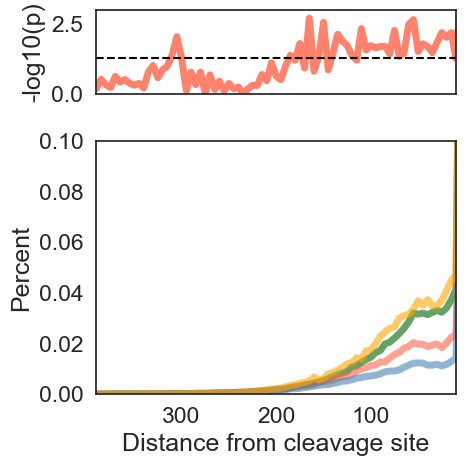

In [43]:
#Run t-test between percent nt ussage at each postion
stat_vals_5 = stats.ttest_ind(
                            [base_count_dist_u_h115_1_bins[1]/(base_count_dist_u_h115_1_bins[2] + base_count_dist_u_h115_1_bins[1]), base_count_dist_u_h115_2_bins[1]/(base_count_dist_u_h115_2_bins[2] + base_count_dist_u_h115_2_bins[1])],
                            [base_count_dist_u_h117_1_bins[1]/(base_count_dist_u_h117_1_bins[2] + base_count_dist_u_h117_1_bins[1]), base_count_dist_u_h117_2_bins[1]/(base_count_dist_u_h117_2_bins[2] + (base_count_dist_u_h117_2_bins[1]))])[-1]

#############################################################

#Figure for percent nt - 5' end A
#Generate plot
fig, (ax2, axs) = plt.subplots(2, 1, gridspec_kw={'height_ratios': [1, 3]}, figsize=(5, 5))

###############################################
#proximal
sns.lineplot(x = (base_count_dist_u_h112_1_bins[0] + base_count_dist_u_h112_2_bins[0])/2, 
             y=(base_count_dist_u_h112_1_bins[1]/(base_count_dist_u_h112_1_bins[2] + base_count_dist_u_h112_1_bins[1])) + 
               (base_count_dist_u_h112_2_bins[1]/(base_count_dist_u_h112_2_bins[2] + base_count_dist_u_h112_2_bins[1]))/2, 
                alpha=.6, color = 'darkgreen', ax = axs, linewidth = 5)


sns.lineplot(x = (base_count_dist_u_h113_1_bins[0] + base_count_dist_u_h113_2_bins[0])/2, 
             y=(base_count_dist_u_h113_1_bins[1]/(base_count_dist_u_h113_1_bins[2] + base_count_dist_u_h113_1_bins[1])) + 
               (base_count_dist_u_h113_2_bins[1]/(base_count_dist_u_h113_2_bins[2] + base_count_dist_u_h113_2_bins[1]))/2, 
                alpha=.6, color = 'tomato', ax = axs, linewidth = 5)

sns.lineplot(x = (base_count_dist_u_h115_1_bins[0] + base_count_dist_u_h115_2_bins[0])/2, 
             y=(base_count_dist_u_h115_1_bins[1]/(base_count_dist_u_h115_1_bins[2] + base_count_dist_u_h115_1_bins[1])) + 
               (base_count_dist_u_h115_2_bins[1]/(base_count_dist_u_h115_2_bins[2] + base_count_dist_u_h115_2_bins[1]))/2, 
                alpha=.6, color = 'steelblue', ax = axs, linewidth = 5)

sns.lineplot(x = (base_count_dist_u_h117_1_bins[0] + base_count_dist_u_h117_2_bins[0])/2, 
             y=(base_count_dist_u_h117_1_bins[1]/(base_count_dist_u_h117_1_bins[2] + base_count_dist_u_h117_1_bins[1])) + 
               (base_count_dist_u_h117_2_bins[1]/(base_count_dist_u_h117_2_bins[2] + base_count_dist_u_h117_2_bins[1]))/2, 
                alpha=.6, color = 'orange', ax = axs, linewidth = 5)


ax2 = sns.lineplot(x = (base_count_dist_u_h115_1_bins[0] + base_count_dist_u_h115_2_bins[0])/2, 
                   y = -np.log10(stat_vals_5), 
                   alpha=.8, color = 'tomato', ax = ax2, linewidth = 5)

ax2.set_ylabel("-log10(p)")
ax2.axhline(-np.log10(0.05), linestyle = '--', color = 'black')

axs.set_xlim(10, 390)
ax2.set_xlim(10, 390)
ax2.set(xticklabels=[])  # remove the tick labels
ax2.tick_params(bottom=False)  # remove the ticks

axs.set_ylim(0, 0.1)
ax2.set_ylim(0,3)

axs.set_ylabel("Percent")
axs.set_xlabel("Distance from cleavage site")

labels = [400,300,200,100]
axs.set_xticklabels(labels)

fig.tight_layout()

plt.show()